## Hampel filter

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from hampel import hampel
import pandas as pd

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
# import matplotlib.ticker as ticker

%matplotlib widget

https://github.com/erykml/medium_articles/blob/master/Machine%20Learning/outlier_detection_hampel_filter.ipynb

In [39]:
def hampel_filter_pandas(input_series, window_size, n_sigmas=3):
    '''
    Function for outlier detection using the Hampel filter.
    
    Parameters
    ------------
    input_series : pd.Series
        The series on which outlier detection will be performed
    window_size : int
        The size of the window (one-side). Total window size is 2*window_size+1
    n_sigmas : int
        The number of standard deviations used for identifying outliers

    Returns
    -----------
    new_series : pd.Series
        The array in which outliers were replaced with respective window medians
    indices : np.ndarray
        The array containing the indices of detected outliers
    '''

    k = 1.4826 # scale factor for Gaussian distribution
    new_series = input_series.copy()

    # helper lambda function 
    MAD = lambda x: np.median(np.abs(x - np.median(x)))
    
    rolling_median = input_series.rolling(window=2*window_size, center=True).median()
    rolling_mad = k * input_series.rolling(window=2*window_size, center=True).apply(MAD)
    diff = np.abs(input_series - rolling_median)

    # indices = list(np.argwhere(diff > (n_sigmas * rolling_mad)).flatten())
    indices = df.index[diff > (n_sigmas * rolling_mad)]
    new_series[indices] = rolling_median[indices]
    
    return new_series, indices

In [4]:
start = '2024-01-10 00:00:00'
end = '2024-01-11 00:00:00'
date_range = pd.date_range(start, end, freq='15min')
df = pd.DataFrame(index=date_range).rename_axis('date')
# df

In [5]:
def concise(ax):
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

In [6]:
period = 24  # 6-hour period, 15-min frequency
t = np.arange(len(df))
amplitude = 5  # Amplitude of the oscillation
trend = 0.3 * t  # Increasing trend
noise = 2 * np.random.normal(0, 1, size=len(df))  # Adding some noise
df['signal'] = amplitude * np.sin(2 * np.pi * t / period) + trend + noise

## add outliers
df.loc['2024-01-10 04:00:00'] = df.loc['2024-01-10 04:00:00'] + 25
df.loc['2024-01-10 18:00:00'] = df.loc['2024-01-10 18:00:00'] - 30
# df

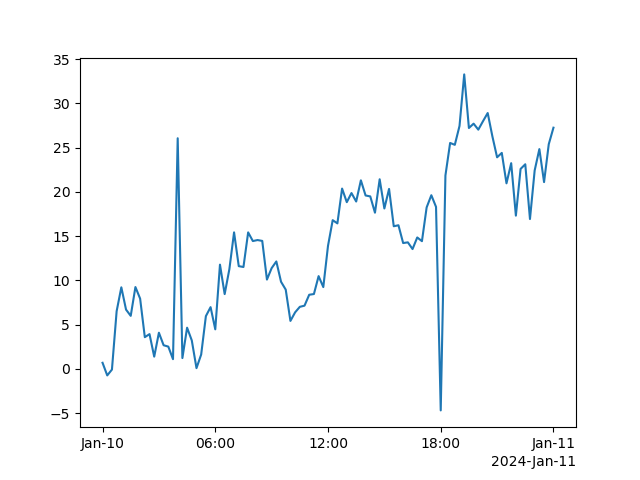

In [7]:
fig, ax = plt.subplots()
ax.plot(df['signal'])
concise(ax)

In [38]:
window_size=10
k = 1.4826 # scale factor for Gaussian distribution
n_sigmas = 3

new_series = df['signal'].copy()
MAD = lambda x: np.median(np.abs(x - np.median(x)))
rolling_median = df['signal'].rolling(window=2*window_size, center=True).median()
rolling_mad = k * df['signal'].rolling(window=2*window_size, center=True).apply(MAD)
diff = np.abs(df['signal'] - rolling_median)
# indices = list(np.argwhere(diff > (n_sigmas * rolling_mad)).flatten())
indices = df.index[diff > (n_sigmas * rolling_mad)]

In [37]:
mask = diff > (n_sigmas * rolling_mad)
df.index[mask]

DatetimeIndex(['2024-01-10 04:00:00', '2024-01-10 18:00:00'], dtype='datetime64[ns]', name='date', freq=None)

<Axes: xlabel='date'>

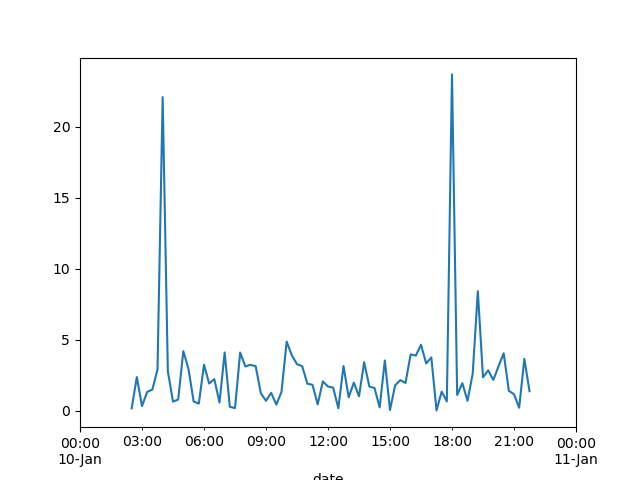

In [30]:
fig, ax = plt.subplots()

diff.plot()

In [ ]:
    new_series = input_series.copy()

    # helper lambda function 
    
    
    
    
    

    
    new_series[indices] = rolling_median[indices]

In [8]:
df['smooth1'] = df['signal'].rolling('60min', center=True).mean()
df['median1'] = df['signal'].rolling(10, center=True).median()

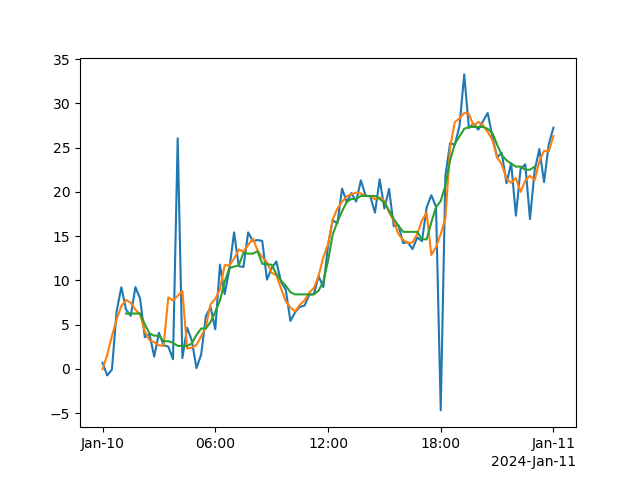

In [9]:
fig, ax = plt.subplots()
ax.plot(df['signal'])
ax.plot(df['smooth1'])
ax.plot(df['median1'])

concise(ax)

In [11]:
df['signal']

date
2024-01-10 00:00:00     0.678563
2024-01-10 00:15:00    -0.747962
2024-01-10 00:30:00    -0.087875
2024-01-10 00:45:00     6.511266
2024-01-10 01:00:00     9.214426
                         ...    
2024-01-10 23:00:00    22.428965
2024-01-10 23:15:00    24.845374
2024-01-10 23:30:00    21.111949
2024-01-10 23:45:00    25.395288
2024-01-11 00:00:00    27.264979
Freq: 15T, Name: signal, Length: 97, dtype: float64

In [41]:
res, detected_outliers = hampel_filter_pandas(df['signal'], 10)
res

date
2024-01-10 00:00:00     0.678563
2024-01-10 00:15:00    -0.747962
2024-01-10 00:30:00    -0.087875
2024-01-10 00:45:00     6.511266
2024-01-10 01:00:00     9.214426
                         ...    
2024-01-10 23:00:00    22.428965
2024-01-10 23:15:00    24.845374
2024-01-10 23:30:00    21.111949
2024-01-10 23:45:00    25.395288
2024-01-11 00:00:00    27.264979
Freq: 15T, Name: signal, Length: 97, dtype: float64

In [104]:
result = hampel(df['signal'], window_size=7, n_sigma=1.0)

filtered_data = result.filtered_data
outlier_indices = result.outlier_indices
medians = result.medians
mad_values = result.median_absolute_deviations
thresholds = result.thresholds

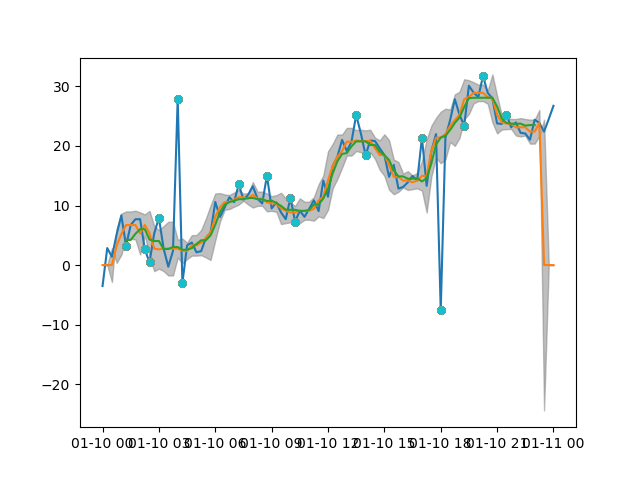

In [105]:
fig, ax = plt.subplots()
ax.plot(df['signal'])

ax.plot(df.index, medians)
ax.plot(df['median1'])


for i in result.outlier_indices:
    # ax.plot([(df.index)[i]], [df.iloc[i]['signal']], 'ro', markersize=5)  # Mark as red
    ax.plot(df.iloc[result.outlier_indices]['signal'],
            ls='None', marker='o', markersize=5)
    
ax.fill_between(df.index, medians + thresholds,
                     medians - thresholds, color='gray', alpha=0.5, label='Median +- Threshold')


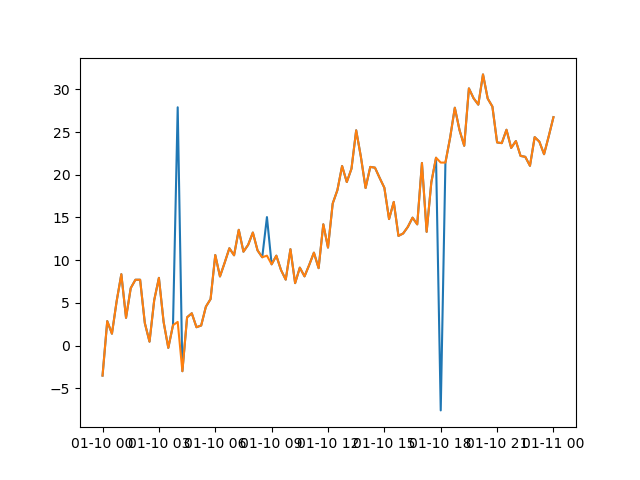

In [95]:
fig, ax = plt.subplots()
ax.plot(df['signal'])

ax.plot(df.index, filtered_data)


In [81]:
df.iloc[result.outlier_indices]['signal']

date
2024-01-10 04:00:00    27.903748
2024-01-10 04:15:00    -3.009718
2024-01-10 07:15:00    13.552254
2024-01-10 08:45:00    15.042277
2024-01-10 18:00:00    -7.601376
2024-01-10 21:30:00    25.271978
Name: signal, dtype: float64

In [2]:
original_data = np.sin(np.linspace(0, 10, 100)) + np.random.normal(0, 0.1, 100)

# Add outliers to the original data
for index, value in zip([20, 40, 60, 80], [2.0, -1.9, 2.1, -0.5]):
    original_data[index] = value

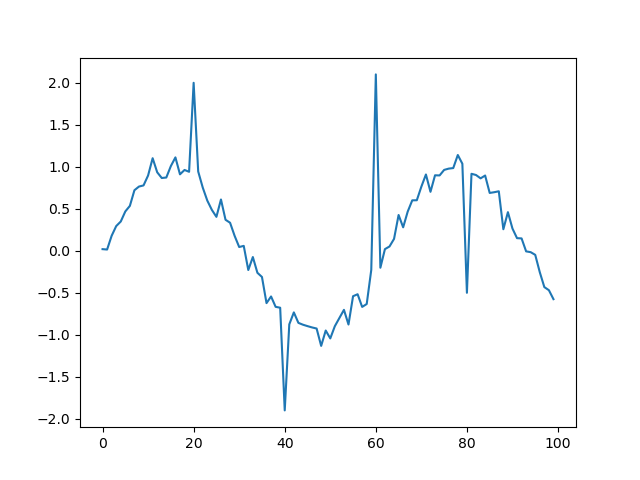

In [5]:
fig, ax = plt.subplots()
ax.plot(original_data)